Торопкин Роман. Лаборатораня работа №1. Вариант - 4

In [242]:
import numpy as np
from scipy.optimize import linprog
np.set_printoptions(precision=3, suppress=True)

Задача 1.Молочный завод выпускает молоко, кефир и сметану, расфасованные в бутылки. На производство 1 т молока, кефира и сметаны требуется соответственно 1010, 1010 и 9450 кг молока. Всего для производства продукции завод может использовать  136 000 кг молока. Затраты рабочего времени при разливе 1 т молока и кефира составляют 0,18 и 0,19 машино-часов. На расфасовке 1 т сметаны заняты специальные автоматы в течение 3,25 машино-часов. Основное оборудование может быть занято в течение 21,4 машино-часов, автоматы по расфасовке сметаны – в течение 16,25 машино-часов. Прибыль от реализации 1 т молока, кефира и сметаны соответственно равна 30, 22 и 136 ден. ед. Завод должен производить не менее 100 т молока, расфасованного в бутылки. На производство другой продукции не имеется ограничений. Требуется составить оптимальный план производства продукции.

In [243]:
c = np.array([30, 22, 136])
print(f'Коэффициенты целевой функции: {c}')

Коэффициенты целевой функции: [ 30  22 136]


In [244]:
A_ub = np.array([[1010.0, 1010.0, 9450.0], [0.18, 0.19, 0.0], [0.0, 0.0, 3.25]])
print(f'Коэффициенты условия ограничений неравенства:\n {A_ub}')

Коэффициенты условия ограничений неравенства:
 [[1010.   1010.   9450.  ]
 [   0.18    0.19    0.  ]
 [   0.      0.      3.25]]


In [245]:
b_ub = np.array([136000, 21.4, 16.25])
print(f'Коэффициенты свободных членов:\n {b_ub}')

Коэффициенты свободных членов:
 [136000.       21.4      16.25]


In [246]:
x1_bounds = (100, None)
x2_bounds = (0, None)
x3_bounds = (0, None)
bounds = [x1_bounds, x2_bounds, x3_bounds]
print(f'Границы x: \n{bounds}')

Границы x: 
[(100, None), (0, None), (0, None)]


Функция linprog находит минимальное решение. Для того, чтобы найти максимальное, необходимо коэфициенты записать с противоположным знаком и итоговую функцию умножить на -1 

In [247]:
res = linprog(c=-c, A_ub = A_ub, b_ub = b_ub, bounds=bounds)
print(f'Максимальное значение x: \n{res.x}\nОптимальное решение: {-1 * res.fun:.3f}')

Максимальное значение x: 
[118.889   0.      1.685]
Оптимальное решение: 3795.812


Задача 2

Z = 3x1+x2+10 -> min

2x1+5x2>=2

x1-x2<=0

x1>=0.5

x2<=4

In [248]:
import matplotlib.pyplot as plt
L1 = lambda x: 2 - x
L2 = lambda x: x
c = [[3],[1]]
p = [[-1/3],[5]]
m = [[1/3],[-5]]

Массив точек на графике

In [249]:
x1 = np.linspace(0,5,100)
y1 = L1(x1)
y2 = L2(x1)
y3 = np.full((100), 4)
A = np.array([[1,1],[1,-1],[1,0],[0,1]])
b = np.array([2,0,0.5,4])

Построение графика

<Figure size 576x432 with 0 Axes>

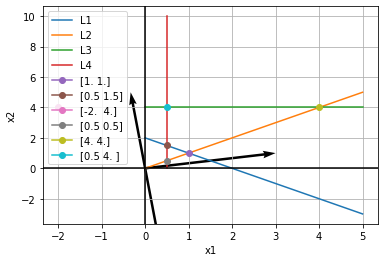

In [250]:
plt.figure(figsize=(8,6))
fig, ax = plt.subplots()    
ax.grid()
ax.plot(x1, y1, label="L1")    
ax.plot(x1, y2, label="L2")  
ax.plot(x1 , y3, label="L3")
ax.plot(np.full((100,), 0.5), np.linspace(0,10,100),  label="L4")
ax.quiver(c[0], c[1], angles='xy', scale_units='xy', scale=1)
ax.quiver(p[0], p[1], angles='xy', scale_units='xy', scale=1)
ax.quiver(m[0], m[1], angles='xy', scale_units='xy', scale=1)
ax.set_xlabel("x1")
ax.set_ylabel("x2")
ax.axhline(y=0, color='k')
ax.axvline(x=0, color='k')   

for i in range(0, len(A)):
    for j in range(i+1, len(A)):
        A1 = np.array([A[i], A[j]])
        b1 = np.array([b[i],b[j]])
        X = np.linalg.solve(A1, b1)
        ax.plot(X[0],X[1],marker="o",label=X)
ax.legend()
plt.show()   

Выбираем точку в зависимости от направления вектора C

In [251]:
Z = c[0][0] * 0.5 + c[1][0] * 1.5 + 10
print(Z)

13.0


Делаем проверку

In [252]:
c = np.array([3,1])
A_ub = np.array([[-1,-1],[1,-1]])
b_ub = np.array([-2, 0])
bounds = [(0.5,None), (0, 4)]
res = linprog(c=c, A_ub = A_ub, b_ub = b_ub, bounds=bounds)
print(f'Минимальное значение x: \n{res.x}\nОптимальное решение: {res.fun + 10:.3f}')

Минимальное значение x: 
[0.5 1.5]
Оптимальное решение: 13.000
